# Week 1 - Question 13a

Write a computer program capable of reducing the number of intensity levels in an image from 256 to 2, in integer powers of 2. The desired number of intensity levels needs to be a variable input to your program.

In [22]:
%matplotlib inline

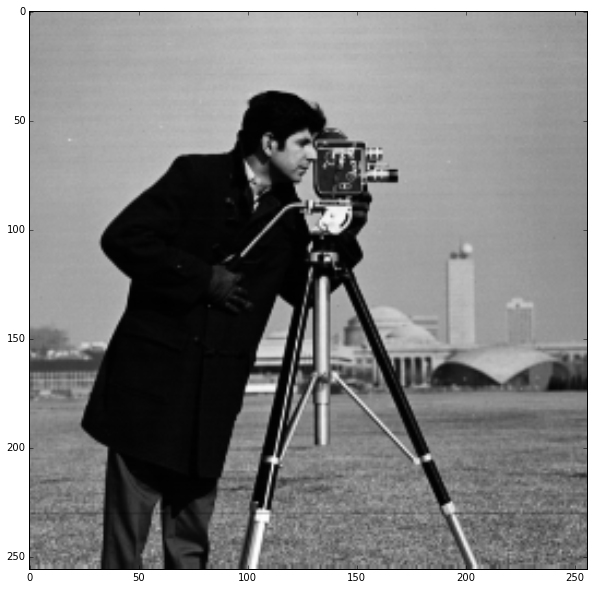

In [170]:
#using OpenCV (just to open the image), matplotlib and numpy
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

#Load a test image - convert to a single channel, and display as a gray scale image
im = cv2.imread("camera_man.png")[:,:,0]
plt.gray()
plt.imshow(im)

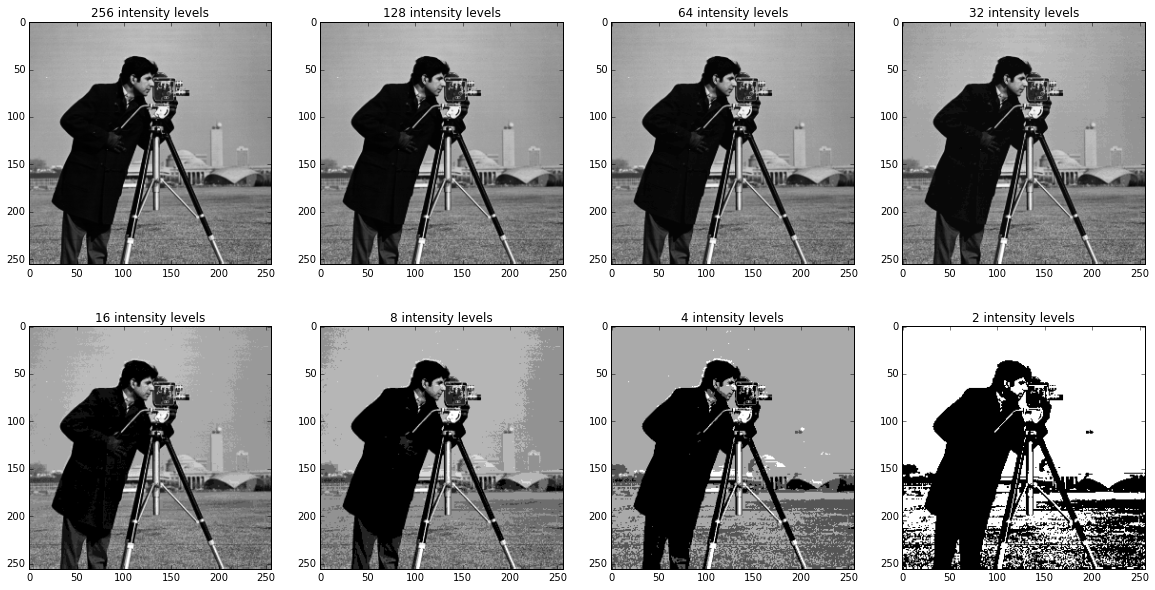

In [238]:
f, axarr = plt.subplots(2, 4)
levels = 256
for i in range(2):
    for j in range(4):
        im_mod = np.array(np.floor(im/(256/levels)*(256/levels)),dtype=np.int32)
        axarr[i,j].imshow(im_mod);
        axarr[i, j].set_title('{} intensity levels'.format(levels))
        levels /= 2 

# Week 1 - Question 13b

Using any programming language you feel comfortable with (it is though recommended to use the provided free Matlab), load an image and then perform a simple spatial 3x3 average of image pixels. In other words, replace the value of every pixel by the average of the values in its 3x3 neighborhood. If the pixel is located at (0,0), this means averaging the values of the pixels at the positions (-1,1), (0,1), (1,1), (-1,0), (0,0), (1,0), (-1,-1), (0,-1), and (1,-1). Be careful with pixels at the image boundaries. Repeat the process for a 10x10 neighborhood and again for a 20x20 neighborhood. Observe what happens to the image (we will discuss this in more details in the very near future, about week 3).

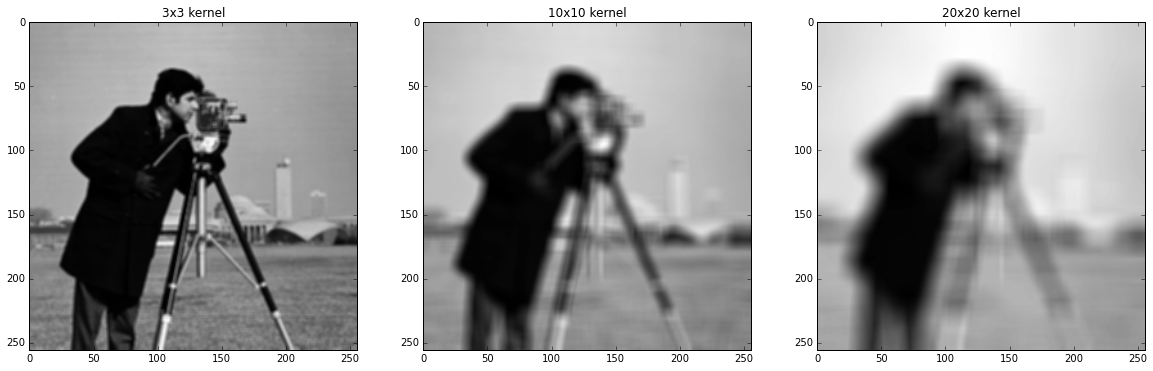

In [193]:
#Using openCV to blur the image using a normalized block filter
f, axarr = plt.subplots(1, 3)
axarr[0].imshow(cv2.blur(im,(3,3)))
axarr[0].set_title('3x3 kernel')

axarr[1].imshow(cv2.blur(im,(10,10)))
axarr[1].set_title('10x10 kernel')

axarr[2].imshow(cv2.blur(im,(20,20)))
axarr[2].set_title('20x20 kernel');

# Week 1 - Question 13c

Rotate the image by 45 and 90 degrees (Matlab provides simple command lines for doing this).

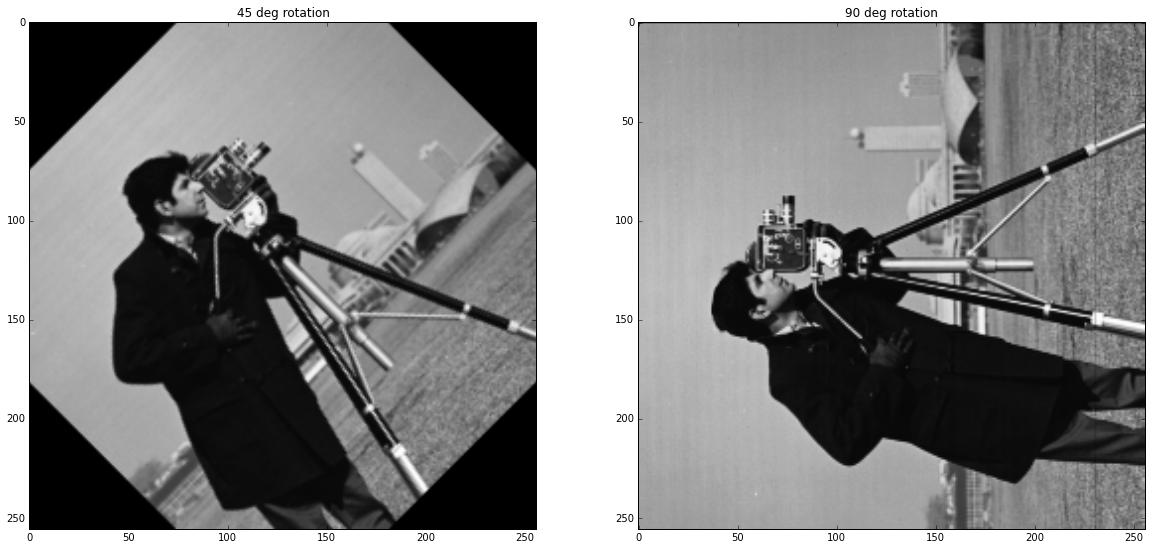

In [202]:
rows,cols = im.shape
M = cv2.getRotationMatrix2D((cols/2,rows/2),45,1)
dst_45 = cv2.warpAffine(im,M,(cols,rows))

M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
dst_90 = cv2.warpAffine(im,M,(cols,rows))

f, axarr = plt.subplots(1, 2)
axarr[0].imshow(dst_45)
axarr[0].set_title('45 deg rotation')

axarr[1].imshow(dst_90)
axarr[1].set_title('90 deg rotation');

# Week 1 - Question 13d

For every 3×3 block of the image (without overlapping), replace all corresponding 9 pixels by their average. This operation simulates reducing the image spatial resolution. Repeat this for 5×5 blocks and 7×7 blocks. If you are using Matlab, investigate simple command lines to do this important operation.

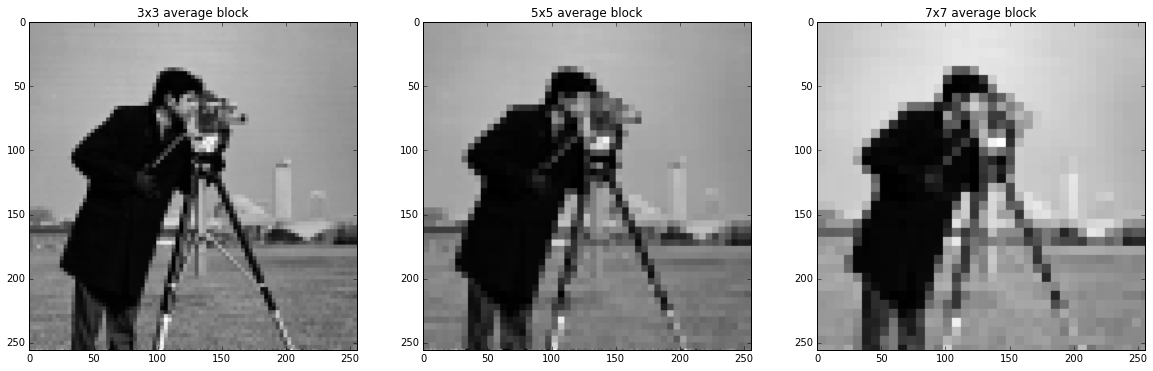

In [262]:
STRIDE = (3,5,7)
rows,cols = im.shape

f, axarr = plt.subplots(1, len(STRIDE))
for i,S in enumerate(STRIDE):
    im_mod = im.copy()
    for r in range(S/2,rows,S):
        for c in range(S/2,cols,S):
            im_mod[r-S/2:r+S/2+1,c-S/2:c+S/2+1] = np.average(im[r-S/2:r+S/2+1,c-S/2:c+S/2+1])
    axarr[i].imshow(im_mod);
    axarr[i].set_title('{}x{} average block'.format(S,S))